In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from sklearn import datasets
from math import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [2]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

In [3]:
df=pd.read_csv('DATA DM RS HAJI.csv')
y=df.iloc[:,-1].values
df

,Nama,Umur,GDS,2JamPP,GDP,LDL,DM
0,Elgeka Sugiharto Kusuma,71,155,222,140,163,1
1,Heri Sugiyanto,39,75,108,145,111,1
2,Dedy Setyawan,50,222,222,114,138,1
3,Yuliani,38,202,215,278,161,1
4,Arafah,61,211,203,93,146,1
...,...,...,...,...,...,...,...
96,Umi Hanik,69,134,160,111,127,0
97,Damirah,63,99,126,132,158,0
98,Komari,45,141,166,98,147,0
99,Amirul Faruk,46,134,123,101,226,1


In [4]:
dataset = df.drop(df.columns[[0,6]], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    101 non-null    object
 1   Umur    101 non-null    int64 
 2   GDS     101 non-null    int64 
 3   2JamPP  101 non-null    int64 
 4   GDP     101 non-null    int64 
 5   LDL     101 non-null    int64 
 6   DM      101 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [6]:
#Menampilkan kolom dataset
columns = list(df.columns)
columns

['Nama ', 'Umur', 'GDS', '2JamPP', 'GDP', 'LDL', 'DM']

In [7]:
df.duplicated().sum()

0

## Missing Values

In [8]:
df.isna().any()

Nama      False
Umur      False
GDS       False
2JamPP    False
GDP       False
LDL       False
DM        False
dtype: bool

In [9]:
# Cek null values
df.isnull().sum()

Nama      0
Umur      0
GDS       0
2JamPP    0
GDP       0
LDL       0
DM        0
dtype: int64

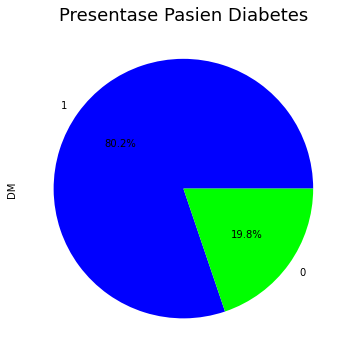

In [10]:
plt.figure(figsize=(5,7))
df['DM'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['blue','lime'])
plt.title("Presentase Pasien Diabetes", fontdict={'fontsize': 18})

plt.tight_layout()

sebesar 80,2% pasien di diagnosis mengidap diabetes

In [11]:
import statsmodels.api as sm 
X = np.append(arr = np.ones((101,0)).astype(int), values = dataset, axis = 1) 
X_opt = X[:]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

def backwardElimination(X, sl):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, X).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    X = np.delete(X, j, 1)
                    regressor_OLS.summary()
    return X

SL = 0.05
X_train_opt = X[:]
X_Modeled = backwardElimination(X_train_opt, SL)

In [12]:
df = pd.DataFrame(X)
df

,0,1,2,3,4
0,71,155,222,140,163
1,39,75,108,145,111
2,50,222,222,114,138
3,38,202,215,278,161
4,61,211,203,93,146
...,...,...,...,...,...
96,69,134,160,111,127
97,63,99,126,132,158
98,45,141,166,98,147
99,46,134,123,101,226


In [13]:
df = pd.DataFrame(X_Modeled)
df

,0,1,2
0,71,155,140
1,39,75,145
2,50,222,114
3,38,202,278
4,61,211,93
...,...,...,...
96,69,134,111
97,63,99,132
98,45,141,98
99,46,134,101


In [14]:
import statsmodels.api as sm 
sl = 0.05
regressor_OLS = sm.OLS(endog = y, exog = X_Modeled).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              174.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                    3.67e-39
Time:                        19:07:39   Log-Likelihood:                         -38.907
No. Observations:                 101   AIC:                                      83.81
Df Residuals:                      98   BIC:                                      91.66
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0045      0.001      3.082      0.003       0.002       0.007
x2             0.0019      0.001      3.367      0.001       0.001       0.003
x3             0.0014      0.001      2.130      0.036    9.23e-05       0.003
==============================================================================
Omnibus:                       15.203   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.806
Skew:                          -0.823   Prob(JB):                      0.00100
Kurtosis:                       2.245   Cond. No.                         10.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.api as sm 
sl = 0.05
regressor_OLS = sm.OLS(endog = y, exog = dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              108.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                    7.23e-38
Time:                        19:07:40   Log-Likelihood:                         -36.596
No. Observations:                 101   AIC:                                      83.19
Df Residuals:                      96   BIC:                                      96.27
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Umur           0.0063      0.002      3.202      0.002       0.002       0.010
GDS            0.0016      0.001      2.062      0.042    5.95e-05       0.003
2JamPP         0.0008      0.001      1.248      0.215      -0.000       0.002
GDP            0.0012      0.001      1.725      0.088      -0.000       0.003
LDL           -0.0014      0.001     -1.639      0.105      -0.003       0.000
==============================================================================
Omnibus:                       12.037   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.729
Skew:                          -0.716   Prob(JB):                      0.00468
Kurtosis:                       2.293   Cond. No.                         20.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
dataset

,Umur,GDS,2JamPP,GDP,LDL
0,71,155,222,140,163
1,39,75,108,145,111
2,50,222,222,114,138
3,38,202,215,278,161
4,61,211,203,93,146
...,...,...,...,...,...
96,69,134,160,111,127
97,63,99,126,132,158
98,45,141,166,98,147
99,46,134,123,101,226


In [17]:
dataset = dataset.drop(dataset.columns[[2]], axis = 1)

In [18]:
import statsmodels.api as sm 
sl = 0.05
regressor_OLS = sm.OLS(endog = y, exog = dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              134.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                    1.26e-38
Time:                        19:07:40   Log-Likelihood:                         -37.409
No. Observations:                 101   AIC:                                      82.82
Df Residuals:                      97   BIC:                                      93.28
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Umur           0.0067      0.002      3.456      0.001       0.003       0.011
GDS            0.0022      0.001      3.761      0.000       0.001       0.003
GDP            0.0015      0.001      2.318      0.023       0.000       0.003
LDL           -0.0015      0.001     -1.709      0.091      -0.003       0.000
==============================================================================
Omnibus:                       12.131   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.732
Skew:                          -0.714   Prob(JB):                      0.00467
Kurtosis:                       2.286   Cond. No.                         16.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
dataset = dataset.drop(dataset.columns[[3]], axis = 1)

In [20]:
import statsmodels.api as sm 
sl = 0.05
regressor_OLS = sm.OLS(endog = y, exog = dataset).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              174.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                    3.67e-39
Time:                        19:07:41   Log-Likelihood:                         -38.907
No. Observations:                 101   AIC:                                      83.81
Df Residuals:                      98   BIC:                                      91.66
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Umur           0.0045      0.001      3.082      0.003       0.002       0.007
GDS            0.0019      0.001      3.367      0.001       0.001       0.003
GDP            0.0014      0.001      2.130      0.036    9.23e-05       0.003
==============================================================================
Omnibus:                       15.203   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.806
Skew:                          -0.823   Prob(JB):                      0.00100
Kurtosis:                       2.245   Cond. No.                         10.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# shuffle dataset with sample

df_seleksi=pd.read_csv('DATA DM RS HAJI.csv')
df_seleksi = df_seleksi.drop(df_seleksi.columns[[0,3,5]], axis = 1)
print(df_seleksi.shape)

(101, 4)


In [22]:
# set features and target
X, y = df_seleksi.iloc[:, :-1], df_seleksi.iloc[:, -1]

# creating data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 3) (80,)
(21, 3) (21,)


In [23]:
df_seleksi

,Umur,GDS,GDP,DM
0,71,155,140,1
1,39,75,145,1
2,50,222,114,1
3,38,202,278,1
4,61,211,93,1
...,...,...,...,...
96,69,134,111,0
97,63,99,132,0
98,45,141,98,0
99,46,134,101,1


In [24]:
X_train.shape

(80, 3)

In [25]:
# train the model
x = NaiveBayesClassifier()

x.fit(X_train, y_train)

In [26]:
x.classes, x.feature_nums, x.rows, x.count

(array([0, 1], dtype=int64), 3, 80, 2)

In [27]:
x.calc_prior(X_train, y_train)

array([0.2, 0.8])

In [28]:
x.prior

array([0.2, 0.8])

In [29]:
#menampilkan hasil dari mean dan varian
x.calc_statistics(X_train, y_train)

(array([[ 60.125   , 102.5     , 104.75    ],
        [ 60.5     , 168.6875  , 161.109375]]),
 array([[  93.859375  ,  286.75      ,  235.8125    ],
        [ 124.75      , 3891.74609375, 4109.15991211]]))

In [30]:
x.mean

array([[ 60.125   , 102.5     , 104.75    ],
       [ 60.5     , 168.6875  , 161.109375]])

In [31]:
x.var

array([[  93.859375  ,  286.75      ,  235.8125    ],
       [ 124.75      , 3891.74609375, 4109.15991211]])

In [32]:
X_train

,Umur,GDS,GDP
62,76,136,130
3,38,202,278
71,57,102,138
45,73,135,122
48,63,188,112
...,...,...,...
97,63,99,132
67,84,254,123
64,43,129,120
47,60,228,278


In [33]:
y_train.array

<PandasArray>
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
 1, 1]
Length: 80, dtype: int64

In [34]:
predictions = x.predict(X_test)

In [35]:
x.accuracy(y_test, predictions)

0.8571428571428571

In [36]:
ps = precision_score(y_test, predictions)
print("Precision: ",ps)

Precision:  1.0


In [37]:
r = recall_score(y_test, predictions)
print("Recall Score: ",r)

Recall Score:  0.8235294117647058


In [38]:
f1 = f1_score(y_test, predictions)
print("F1-Score: ",f1)

F1-Score:  0.9032258064516129


In [39]:
#[TN FP]
#[FN TP]

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[ 4  0]
 [ 3 14]]


In [40]:
print(y_test.array)

<PandasArray>
[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 21, dtype: int64


In [41]:
print(predictions)

[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [42]:
nb = NaiveBayesClassifier()

In [43]:
k = 8
n_samples = len(X)
fold_size = n_samples // k
scores_a = []
scores_p = []
scores_r = []
scores_f1 = []
masks = []
Accuracy = []

for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    # store the mask for visualization
    masks.append(test_mask)
    # create training and test sets using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    
    #melatih model
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)
    #scores.append(nb.accuracy(y_test, predictions))
    
    from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
    
    print("=== Skenario", fold+1, "===")
    
    scores_a.append(accuracy_score(y_test, predictions))
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: ",accuracy)
    
    scores_p.append(precision_score(y_test, predictions))
    precision_score = precision_score(y_test, predictions)
    print("Precision: ",precision_score)
    
    scores_r.append(recall_score(y_test, predictions))
    recall = recall_score(y_test, predictions)
    print("Recall: ",recall)
    
    scores_f1.append(f1_score(y_test, predictions))
    f1_score = f1_score(y_test, predictions)
    print("F1_Score: ",f1_score)
    
    print("\n")

=== Skenario 1 ===
Accuracy:  0.9166666666666666
Precision:  1.0
Recall:  0.9166666666666666
F1_Score:  0.9565217391304348


=== Skenario 2 ===
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_Score:  1.0


=== Skenario 3 ===
Accuracy:  0.75
Precision:  1.0
Recall:  0.75
F1_Score:  0.8571428571428571


=== Skenario 4 ===
Accuracy:  0.75
Precision:  1.0
Recall:  0.75
F1_Score:  0.8571428571428571


=== Skenario 5 ===
Accuracy:  0.75
Precision:  1.0
Recall:  0.75
F1_Score:  0.8571428571428571


=== Skenario 6 ===
Accuracy:  0.5
Precision:  1.0
Recall:  0.5
F1_Score:  0.6666666666666666


=== Skenario 7 ===
Accuracy:  0.5833333333333334
Precision:  1.0
Recall:  0.375
F1_Score:  0.5454545454545454


=== Skenario 8 ===
Accuracy:  0.9166666666666666
Precision:  0.0
Recall:  0.0
F1_Score:  0.0




C:\Users\Asus A456U\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus A456U\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print("K-Fold 5 Validation (Accuracy)\n",scores_a)

K-Fold 5 Validation (Accuracy)
 [0.9166666666666666, 1.0, 0.75, 0.75, 0.75, 0.5, 0.5833333333333334, 0.9166666666666666]


In [45]:
print("K-Fold 5 Validation (Precision)\n",scores_p)

K-Fold 5 Validation (Precision)
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [46]:
print("K-Fold 5 Validation (Recall)\n",scores_r)

K-Fold 5 Validation (Recall)
 [0.9166666666666666, 1.0, 0.75, 0.75, 0.75, 0.5, 0.375, 0.0]


In [47]:
print("K-Fold 5 Validation (F1_Score)\n",scores_f1)

K-Fold 5 Validation (F1_Score)
 [0.9565217391304348, 1.0, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.6666666666666666, 0.5454545454545454, 0.0]


In [48]:
print("AVG Accuracy = ",np.mean(scores_a),"\n")
print("AVG Precision = ",np.mean(scores_p),"\n")
print("AVG Recall = ",np.mean(scores_r),"\n")
print("AVG F1-Score = ",np.mean(scores_f1))

AVG Accuracy =  0.7708333333333333 

AVG Precision =  0.875 

AVG Recall =  0.6302083333333333 

AVG F1-Score =  0.7175089403350272
